
<br>
    The objective of this exercise is to study the signal of ECG during atrial<br>
    fibrilation (AF). The signal analysed contains different type of AF with<br>
    stable repolarisation loops and random AF.<br>


In [1]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp
import m03_ex2_ext as my_plot


<br>
    The first signal is an ECG with atrial fibrilation.<br>


Q: What are the differences of this ECG with a normal ECG?<br>
In a normal ECG, the p-waves are synchronous with the other parts of the signal (QRST) and in our case (with atrial fibrillation (AF)), they are not. No P wave is easily seen because of the AF. Another point we can see on the figure below is that the interval between the R waves change between the different waves. The oscillations even drung in the T wave that show artrial fribrilation activity.

In [2]:

ecg = np.genfromtxt('ecg_af.dat')
ecg_fs = 300
t_ecg = np.arange(len(ecg))/ecg_fs

(210.0, 215.0)

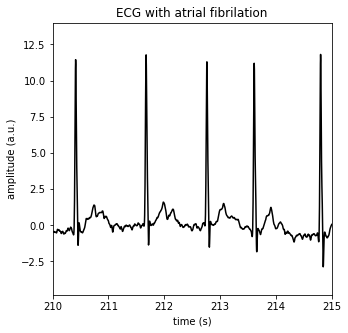

In [3]:
py.figure(1,figsize=[5,5])
py.plot(t_ecg, ecg, 'k')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG with atrial fibrilation')
py.xlim(210, 215)


<br>
    We compute the autocorelation of the ECG signal.<br>
    In order to dircard the modulation of the baseline we first apply a<br>
    high-pass filter with a cut-off frequency of 0.5 Hz.<br>
    

Q: Do you see a specific pattern that permits to characterize the atrial fibrilation?<br>
The Rxx signal shows few oscillations around 0 meaning that the signal is relatively random and lost its periodicity. Then, we see no specific pattern because of the atrial fibrilation and that the duration of the R to R intervals are not constant.

In [4]:
b, a = sp.butter(2, 0.5/ecg_fs*2, btype='high')

In [5]:
ecg_hp = sp.filtfilt(b, a, ecg)

In [6]:
rxx_ecg = np.correlate(ecg_hp, ecg_hp, mode='full') 
k = np.arange(len(rxx_ecg))-len(rxx_ecg)//2

(-500.0, 500.0)

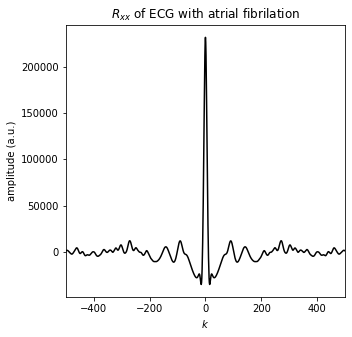

In [7]:
py.figure(2,figsize=[5,5])
py.plot(k, rxx_ecg, 'k')
py.xlabel('$k$')
py.ylabel('amplitude (a.u.)')
py.title('$R_{xx}$ of ECG with atrial fibrilation')
py.xlim(-500, 500)

In [8]:
f, ECG = sp.welch(ecg_hp, nperseg=500, nfft=4096, noverlap=250, fs=ecg_fs)

Compute the PSD of the ECG signal.<br>
  

  Q: What do you see?<br>
  We can see that there is high power in higher frequencies than normal (heart rate is aroung 1Hz) which is normal for atrial fribilation. The power spectral density doesn't allow to analyze much of the signal as the relevant information are hidden by the non-constant R to R intervals.

(0.0, 60.0)

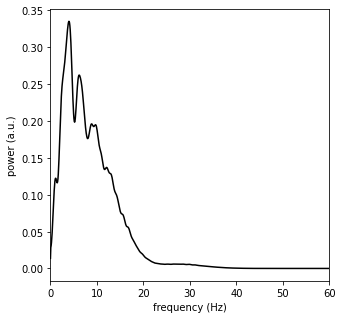

In [9]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(f, ECG, 'k')
py.xlabel('frequency (Hz)')
py.ylabel('power (a.u.)')
py.xlim(0,60)


<br>
    In order to higlight the signal related to the repolarisation of the<br>
    atria and ECG signal with atrial fibrilation has been process, keeping only<br>
    the P wave (repolarisation of the atria) and the QRST waves have been<br>
    removed.<br>
    During the measurement 4 time segments exhibit different behaviors.<br>
    

Q: What are the difference between the different segments ?<br>
None of them have the same "peaks" and their amplitude changes quite in a arbitrary manner between each other
however the 4rth picture stands out as the amplitude seems smaller than the others and his variabilty seems to look more like a noise structure. In opposite, the other three have a more rythmic behavior. The third segment may be the one with the most stable oscillation as his behavior between 50 and around 58 seconds has a repetive one between the different bigger peaks.

In [10]:
p_wave = np.genfromtxt('AF_sync.dat')
p_wave_fs = 50
t_p_wave = np.arange(len(p_wave))/p_wave_fs

In [11]:
segments = [1500, 2000, 2500, 3000, 3500]

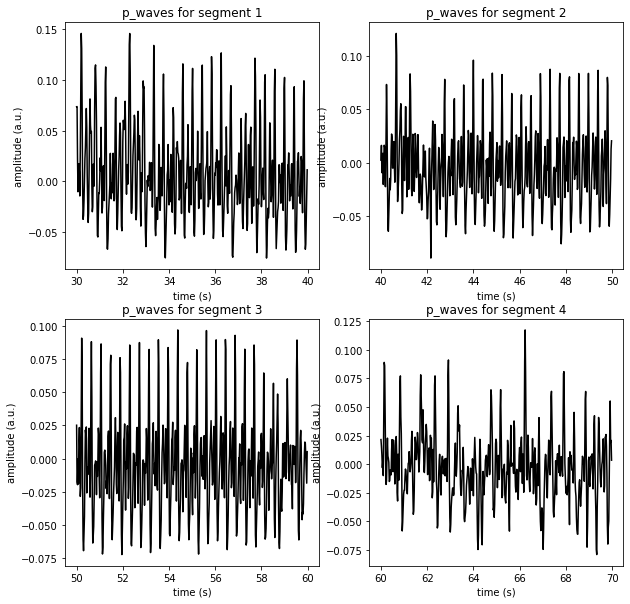

In [12]:
py.figure(4,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    py.plot(t_p_wave[idx], p_wave[idx], 'k')
    py.xlabel('time (s)')
    py.ylabel('amplitude (a.u.)')
    py.title('p_waves for segment '+str(n+1))


<br>
    We compute the autocorelation of the p_wave signal.<br>
    In order to dircard the modulation of the baseline we first apply a<br>
    high-pass filter with a cut-off frequency of 0.5 Hz.<br>
    <br>
    

Q: Do you see a specific pattern that permits to characterize the atrial  fibrilation?<br>
It is difficult to characterize the AF as there is no specific pattern between the 4 Rxx graphs but the peak around 0 in each graph is where a symetry occurs. 


Q: Discuss the organisation of the signals. Which one is the more organised, which one is closer to a noise?<br>
Since there is less peaks at the more or less amplitude it seems that segment 4 is closer to be a noise. Except the biggest peak at k=0, the other parts of the graph have a lot less amplitude wich indicates also that the segment 4 is closer to be a noise. For the other graphs, it is difficult to see which one is the more organised as they all have an symetry at k=0 and they also have a variability of the amplitude.


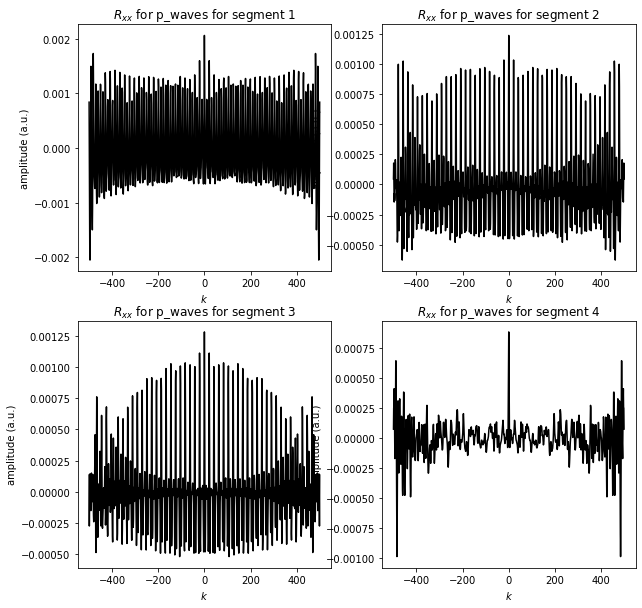

In [13]:
py.figure(5,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    rxx_p_wave = np.correlate(p_wave[idx], p_wave[idx], mode='full') 
    rxx_p_wave /= np.correlate(np.ones(len(idx)), np.ones(len(idx)), mode='full')
    k = np.arange(len(rxx_p_wave))-len(rxx_p_wave)//2
    py.plot(k, rxx_p_wave, 'k')
    py.xlabel('$k$')
    py.ylabel('amplitude (a.u.)')
    py.title('$R_{xx}$ for p_waves for segment '+str(n+1))


<br>
    Compute the PSD of the p_wave signal.<br>
    

Q: What do you see?<br>
We see that for the same segement, there is several (3-5) frequencies that stand out showing (big peaks at these frequencies) that the atrial is beating at these several frequencies. In the segment 4 those frequencies are much less distinguishable showing that it is a noise.

Q: Which one is the more organised?<br>
The segment 3 is the one with the easiest distinguishable frequencies

Q: Which ones looks like a noise?<br>
Segment 4 since as said before it has the less disguished frequencies hence we can assume that it is like a noise.

 Q: Which ones exhibit a sustained repolarisation loop?<br>
Segment 3 exhibit a sustained repolarisation loop as it is the one who is the most organised and therefore, has the most stable oscillation.

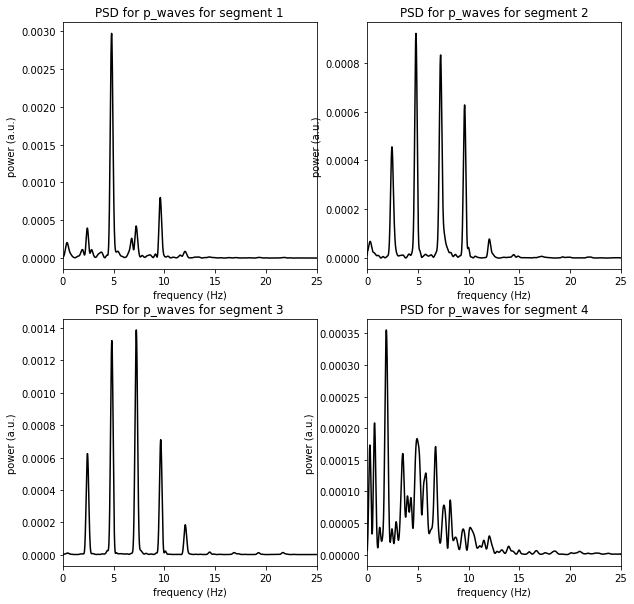

In [14]:
py.figure(7, figsize=[10,10])
for n in range(len(segments)-1):
    idx = np.arange(segments[n], segments[n+1])
    f, P_WAVE = sp.welch(p_wave[idx], nperseg=250, nfft=4096, noverlap=100, fs=p_wave_fs)
    py.subplot(2, 2, int(n+1))
    py.plot(f, P_WAVE, 'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.xlim(0,25)
    py.title('PSD for p_waves for segment '+str(n+1))